<a href="https://colab.research.google.com/github/Hxrdbvss/MVO/blob/main/Laba_1_Hxrdbvss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving cars_moldova_no_dup.csv to cars_moldova_no_dup.csv


# Считываем файл в DataFrame



метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('/content/cars_moldova_no_dup.csv', delimiter = ',')
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2      Volkswagen          Golf  1998  Hatchback       1.0   
3         Renault        Laguna  2012  Universal  110000.0   
4            Opel         Astra  2006  Universal  200000.0   
...           ...           ...   ...        ...       ...   
37259  Land Rover    Freelander  2002  Crossover  225000.0   
37260       Dacia     Logan Mcv  2015  Universal   89000.0   
37261     Renault         Modus  2009  Hatchback     225.0   
37262       Mazda             6  2006      Combi  370000.0   
37263     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2                    1400.0        Petrol       Manual       2200.0  
3                    1500.0        Diesel       Manual       6550.0  
4                    1600.0  Metan/Propan       Manual       4100.0  
...                     ...           ...          ...          ...  
37259                1800.0  Metan/Propan       Manual       4400.0  
37260                1500.0        Diesel       Manual       7000.0  
37261                1500.0        Diesel       Manual       4500.0  
37262                2000.0        Diesel       Manual       4000.0  
37263                1500.0        Diesel       Manual       4000.0  

[37264 rows x 9 columns]

# EDA - Разведывательный анализ данных.

Цель разведывательного анализа данных - попытка предварительного понимания того, с чем вы имеете дело. Например, результатами анализа могут быть удаление аномалий, заполнение (удаление) пропусков, визуализация данных, выделение признаков или получение (или преобразование) новых признаков, удаление некоторых шумов, помех или других нерегулярных значений.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  37264 non-null  object 
 1   Model                 37264 non-null  object 
 2   Year                  37264 non-null  int64  
 3   Style                 37264 non-null  object 
 4   Distance              37264 non-null  float64
 5   Engine_capacity(cm3)  37264 non-null  float64
 6   Fuel_type             37264 non-null  object 
 7   Transmission          37264 non-null  object 
 8   Price(euro)           37264 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ MB


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [ ]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


## Анализ числовых признаков

Статистика по числовым данным

In [ ]:
df.describe()

Year      Distance  Engine_capacity(cm3)   Price(euro)
count  37264.000000  3.726400e+04          37264.000000  3.726400e+04
mean    2007.709264  4.758488e+05           1858.932535  9.569387e+03
std        8.295806  4.591520e+06            707.662731  5.283315e+04
min     1900.000000  0.000000e+00              0.000000  1.000000e+00
25%     2004.000000  9.000000e+04           1499.000000  3.300000e+03
50%     2009.000000  1.700000e+05           1800.000000  6.490000e+03
75%     2014.000000  2.300000e+05           2000.000000  1.179900e+04
max     2021.000000  1.000000e+08           9999.000000  1.000000e+07

рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

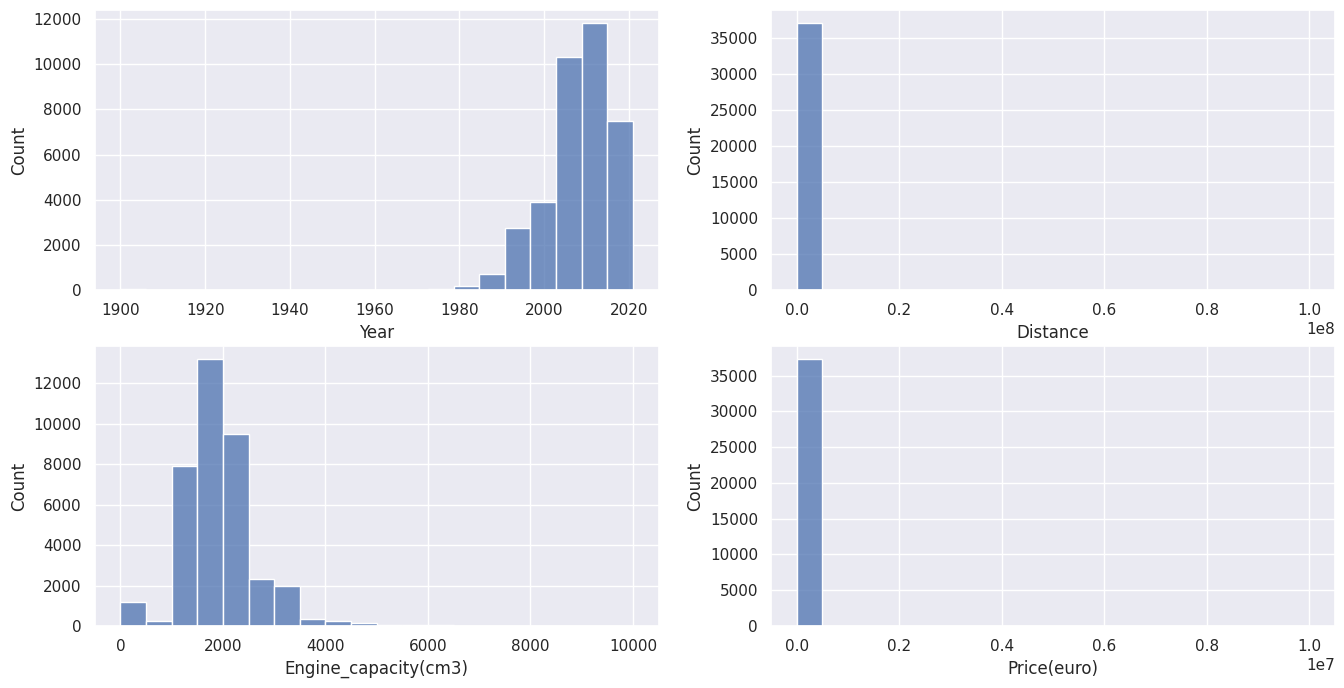

In [ ]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

Столбцы имеют явные аномалии, особенно Distance и Price(euro). Чтобы лучше понять эти аномалии посмотрим на столбцы в логарифмическом масштабе.

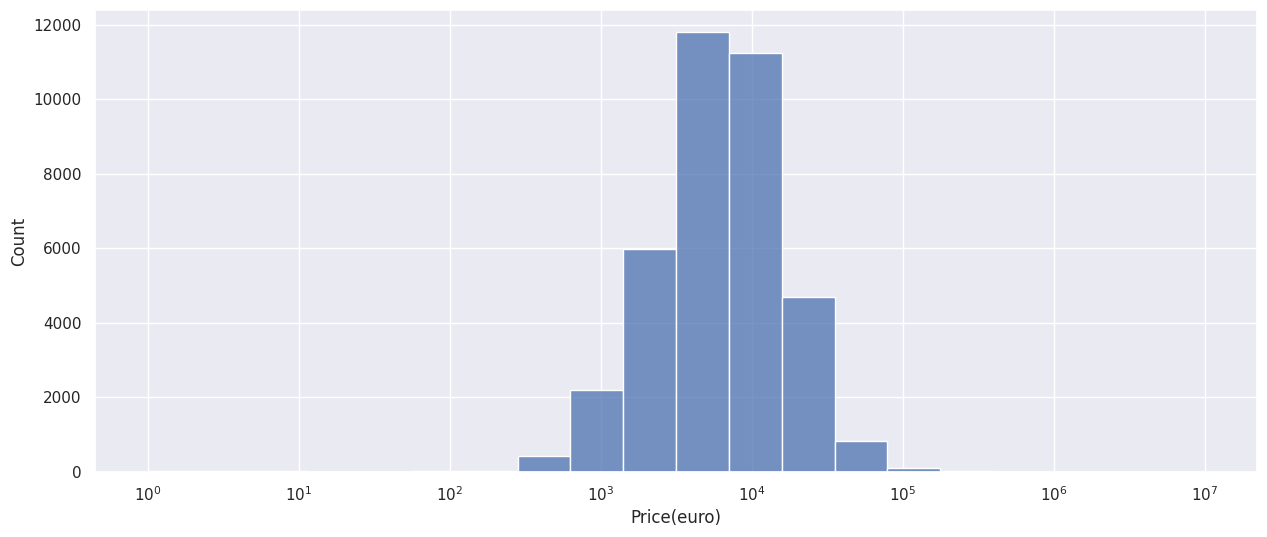

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Price(euro)', bins = 20, log_scale = True);

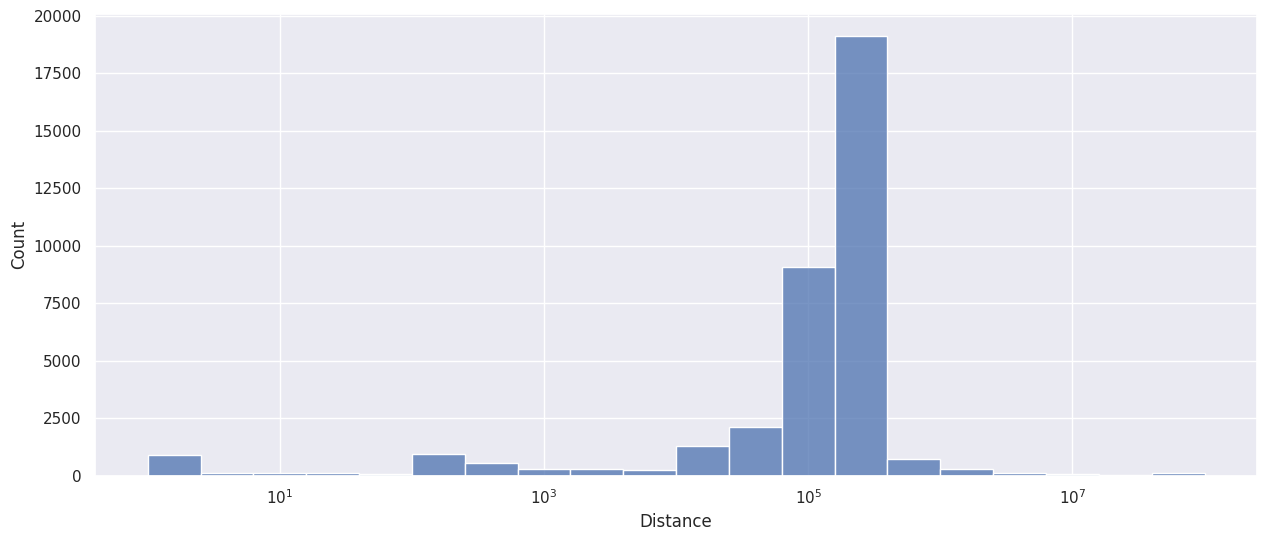

In [ ]:
# Удалим те объекты у которых Расстояние равно 0
question_dist = df[df.Distance == 0]
df = df.drop(question_dist.index)

plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Distance', bins = 20, log_scale = True);

Теперь мы можем определить, что нам требуется, чтобы почистить столбцы.

Также, так как задача хорошо интерпретируема мы можем почистить столбцы пользуясь здравым смыслом.

Например, мы можем удалить записи, где цена меньше 100 евро или пробег меньше 1000 км и год старый.

In [ ]:
# здравый смысл
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)
df.tail()

Make         Model  Year      Style  Distance  \
32529  Volkswagen        Passat  2016      Sedan   88000.0   
32530  Land Rover    Freelander  2002  Crossover  225000.0   
32531       Dacia     Logan Mcv  2015  Universal   89000.0   
32532       Mazda             6  2006      Combi  370000.0   
32533     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
32529                1800.0        Petrol    Automatic      11500.0  
32530                1800.0  Metan/Propan       Manual       4400.0  
32531                1500.0        Diesel       Manual       7000.0  
32532                2000.0        Diesel       Manual       4000.0  
32533                1500.0        Diesel       Manual       4000.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32534 entries, 0 to 32533
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32534 non-null  object 
 1   Model                 32534 non-null  object 
 2   Year                  32534 non-null  int64  
 3   Style                 32534 non-null  object 
 4   Distance              32534 non-null  float64
 5   Engine_capacity(cm3)  32534 non-null  float64
 6   Fuel_type             32534 non-null  object 
 7   Transmission          32534 non-null  object 
 8   Price(euro)           32534 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


Посмотрим на результат

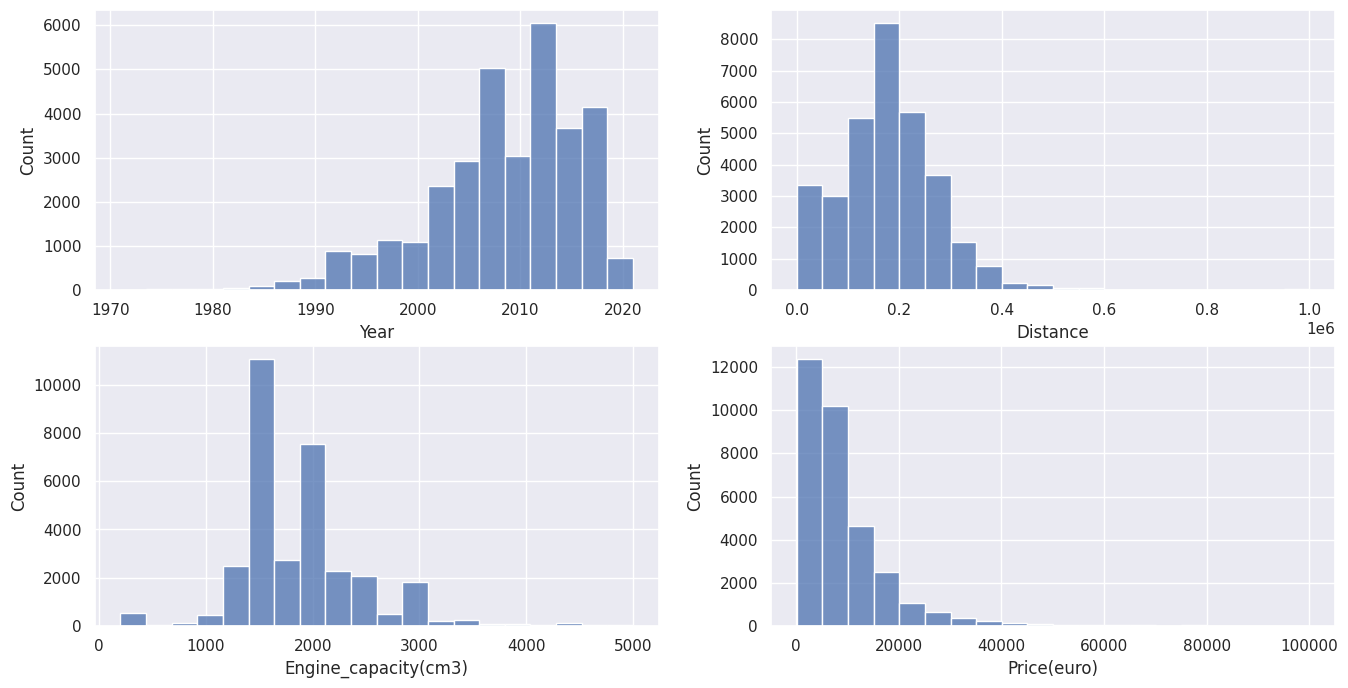

In [ ]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32534 entries, 0 to 32533
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32534 non-null  object 
 1   Model                 32534 non-null  object 
 2   Year                  32534 non-null  int64  
 3   Style                 32534 non-null  object 
 4   Distance              32534 non-null  float64
 5   Engine_capacity(cm3)  32534 non-null  float64
 6   Fuel_type             32534 non-null  object 
 7   Transmission          32534 non-null  object 
 8   Price(euro)           32534 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


**Зависимости параметров друг от друга**

<Figure size 1500x1500 with 0 Axes>

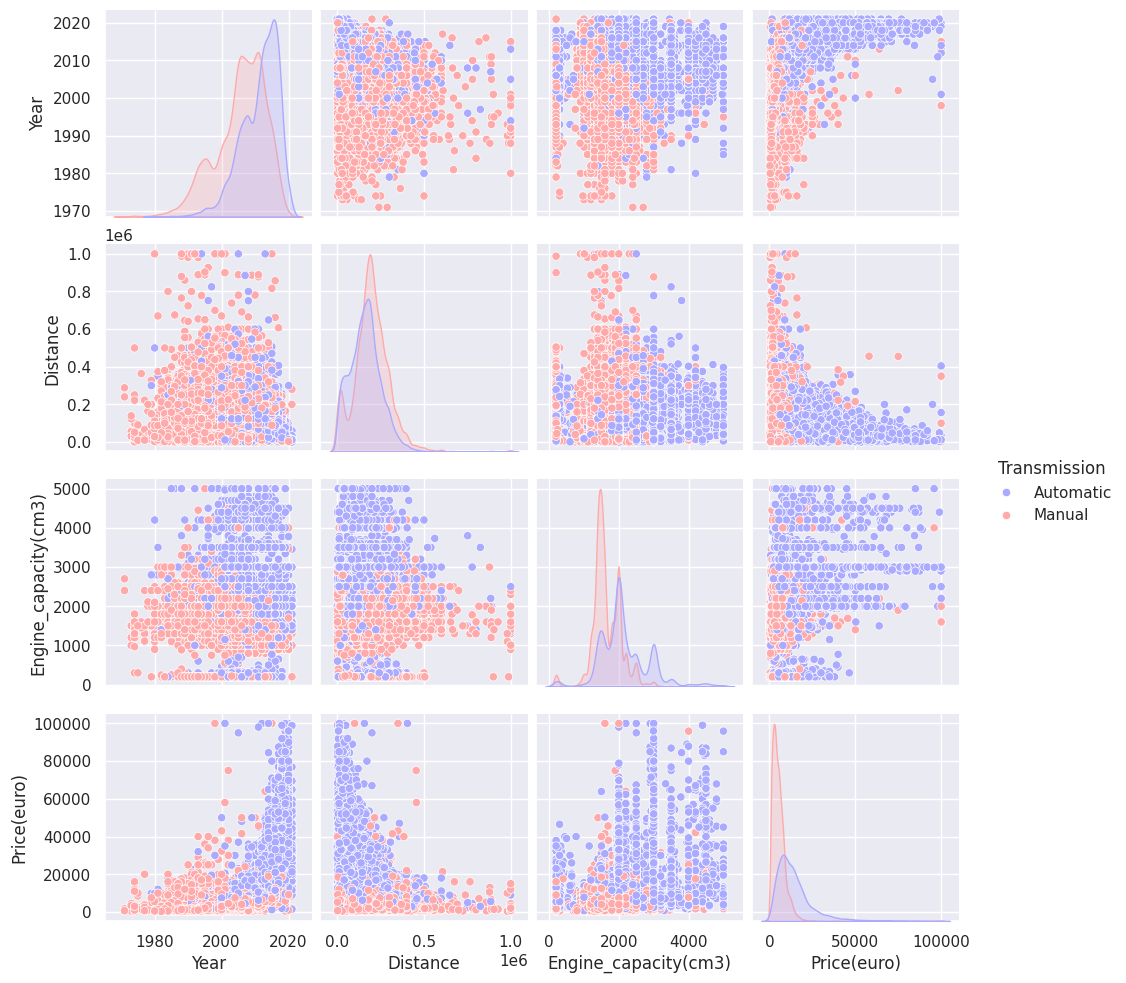

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df,
             hue ='Transmission',
             palette = 'bwr',);

# Предварительная Обработка

**Нормализация**

In [ ]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

<Axes: xlabel='Distance', ylabel='Count'>

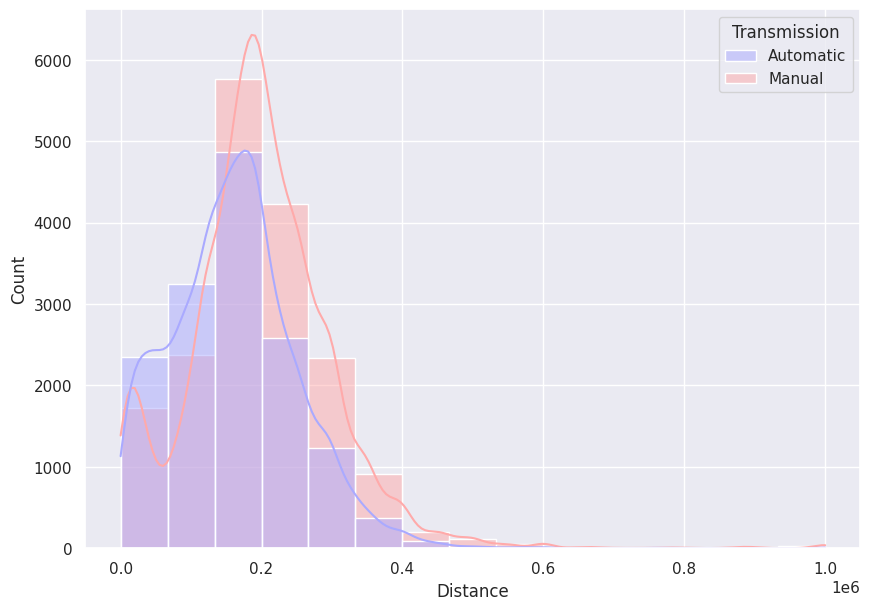

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

<Axes: xlabel='Distance', ylabel='Count'>

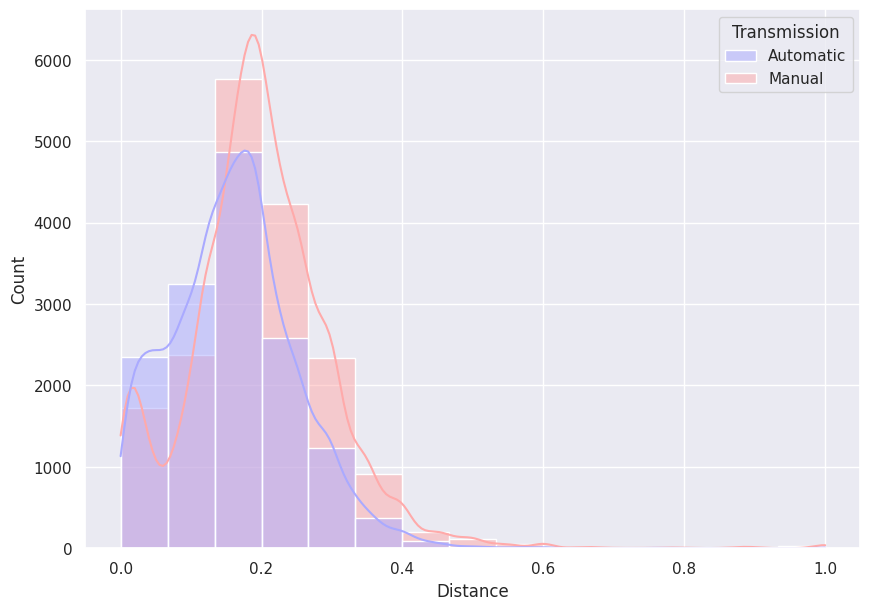

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

**Стандартизация**

In [ ]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

<Axes: xlabel='Distance', ylabel='Count'>

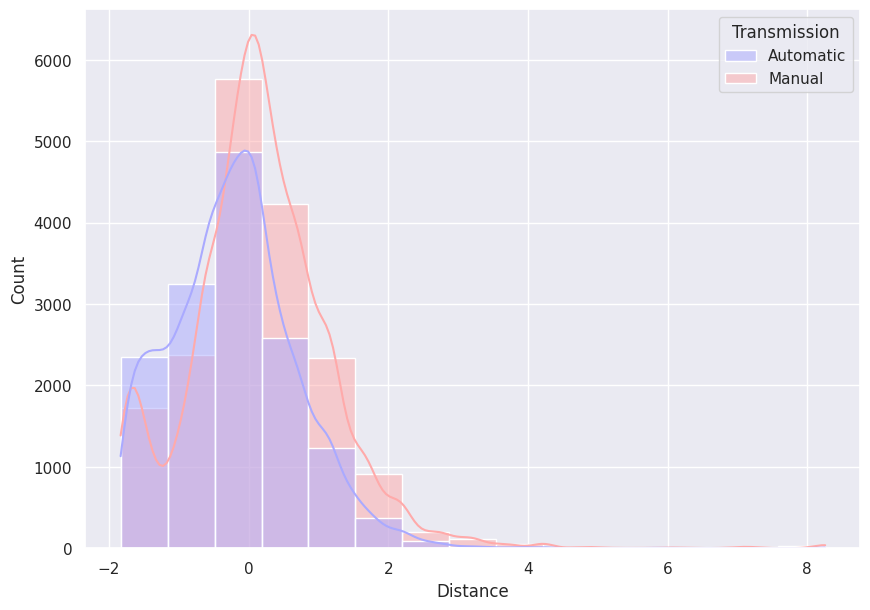

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

**Нелинейное преобразование**

Сначала логарифмирование, потом стандартизация

<Axes: xlabel='Price(euro)', ylabel='Count'>

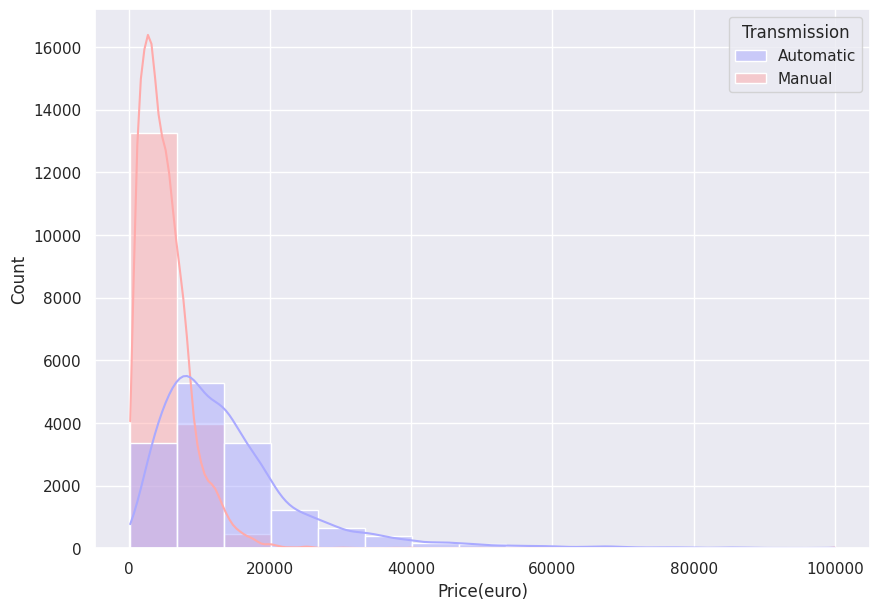

In [ ]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df,
             x = 'Price(euro)',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')


In [ ]:
DF_power  = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

<Axes: xlabel='Price(euro)', ylabel='Count'>

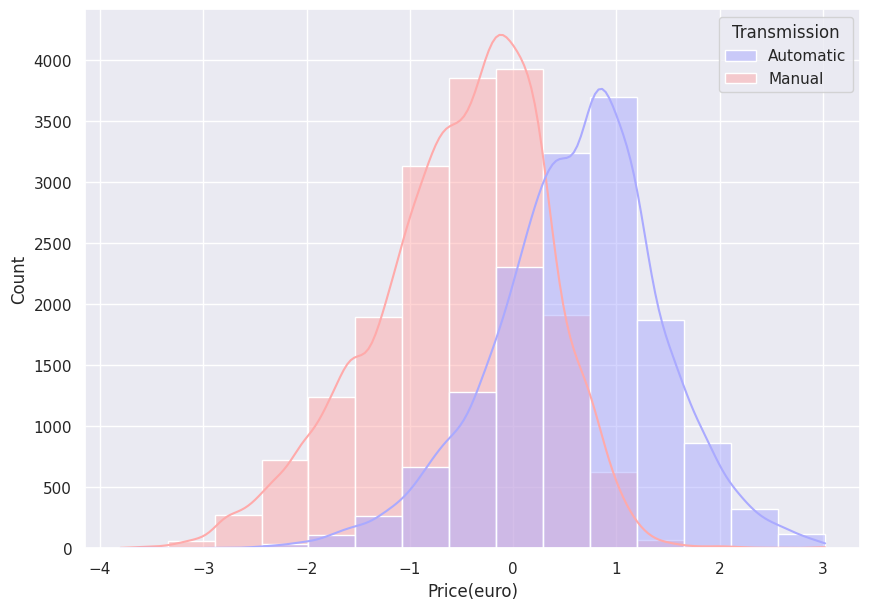

In [ ]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power,
             x = 'Price(euro)',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')


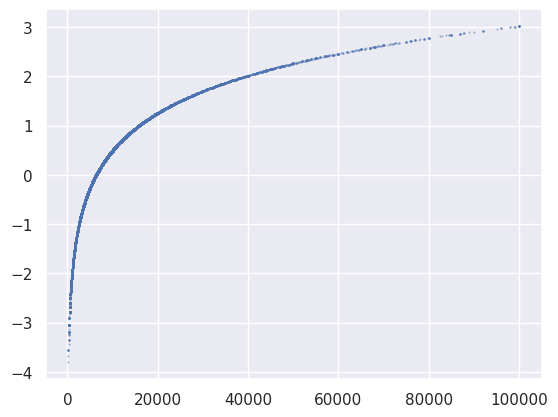

In [ ]:
plt.plot(df['Price(euro)'], DF_power['Price(euro)'], '.', alpha = 0.5, markersize = 1)

### Добавление колонки
Зная суть или модель данных, мы можем предположить, чего нам не хватает - то есть попробовать добавить новый признак в данные. Такую операцию можно провести по-разному. В данном случае мы сделаем это исходя из логики. Введем признак пробег в год. \



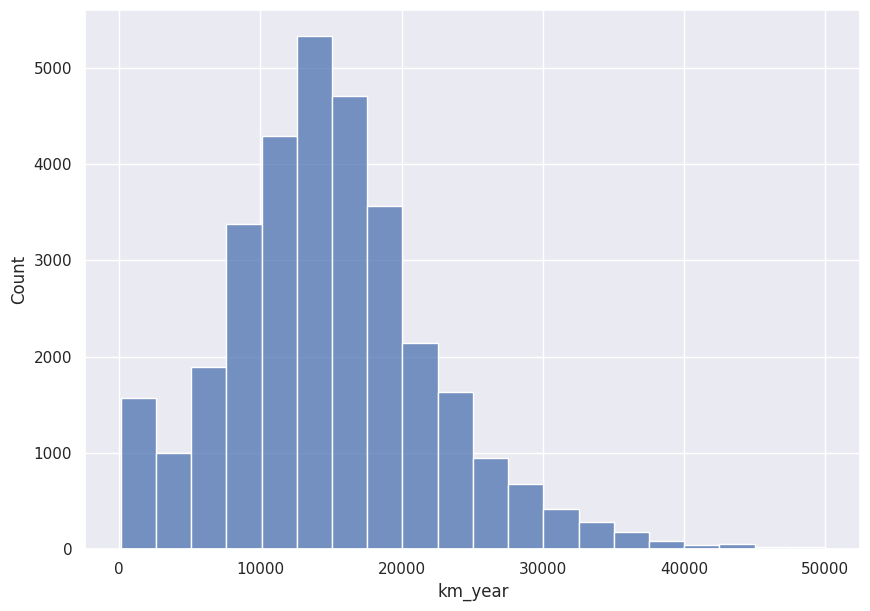

In [ ]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)


plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year', bins = 20);

Отметим, что важно, чтобы новый признак был независим от других - иначе его потом придется удалить.

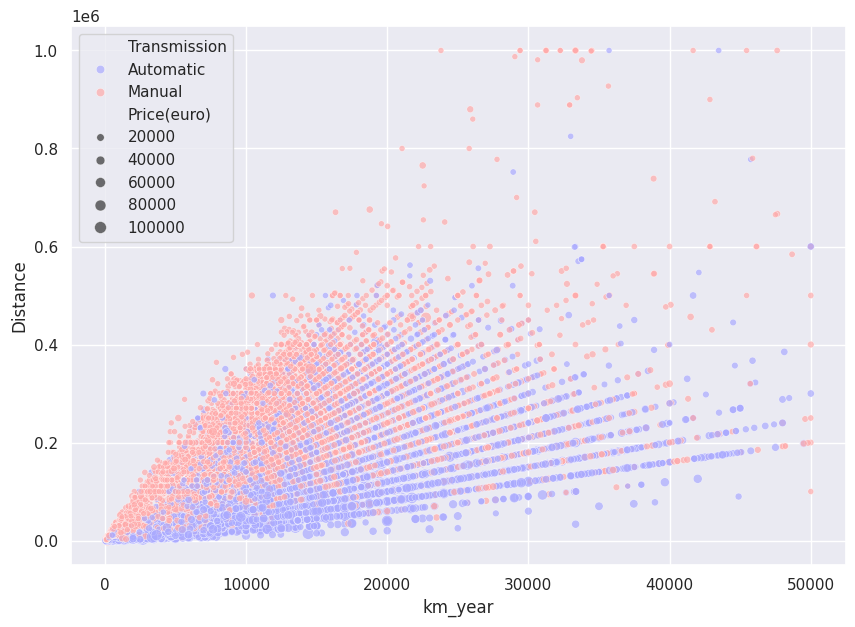

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_year", y="Distance",
    hue="Transmission",
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

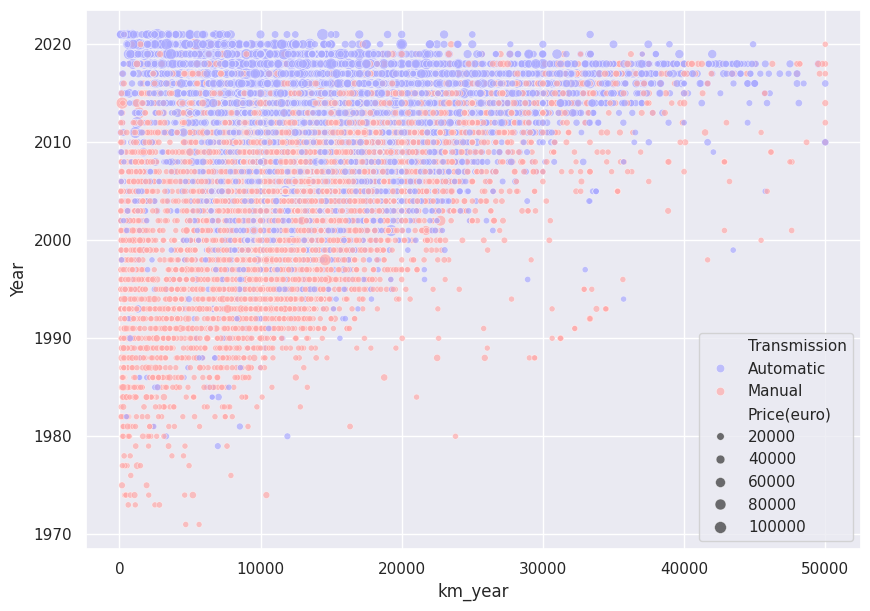

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_year", y="Year",
    hue="Transmission",
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

### Удаление аномалий и связанных признаков.
Часто проведенного выше анализа данных бывает недостаточно. Помимо всего выше изложенного бывает необходимо удаление аномалий из данных.

Посмотрим на аномалии с использованием т.н. boxplot - метода

In [ ]:
num_columns.append('km_year')
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

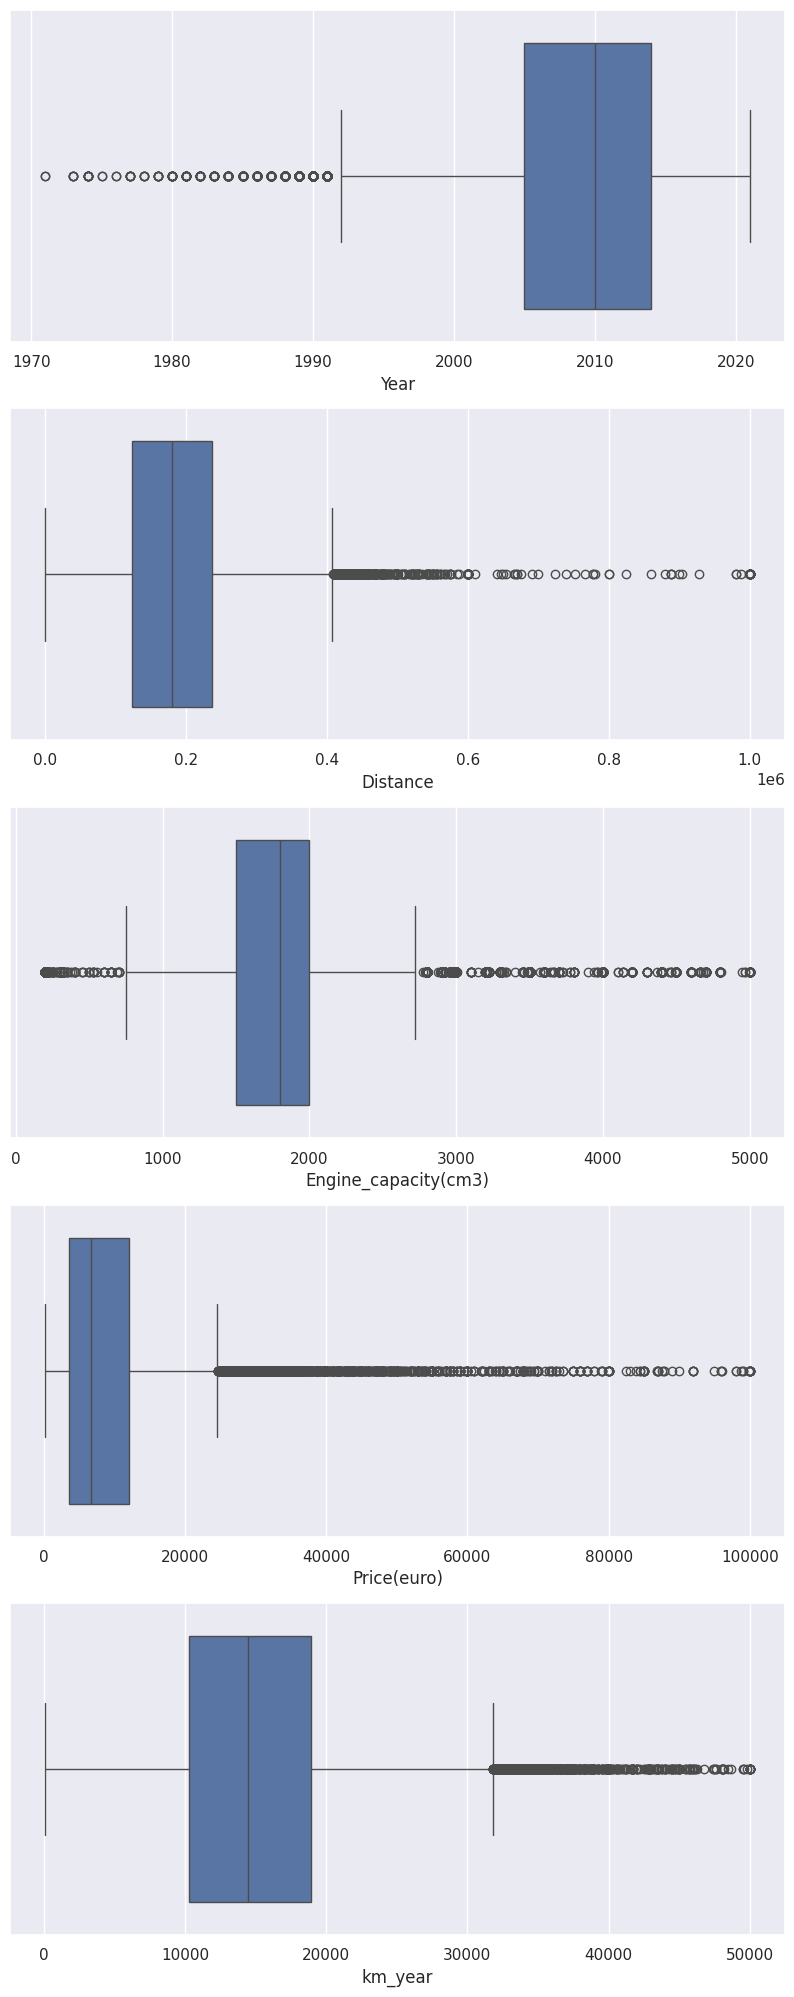

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

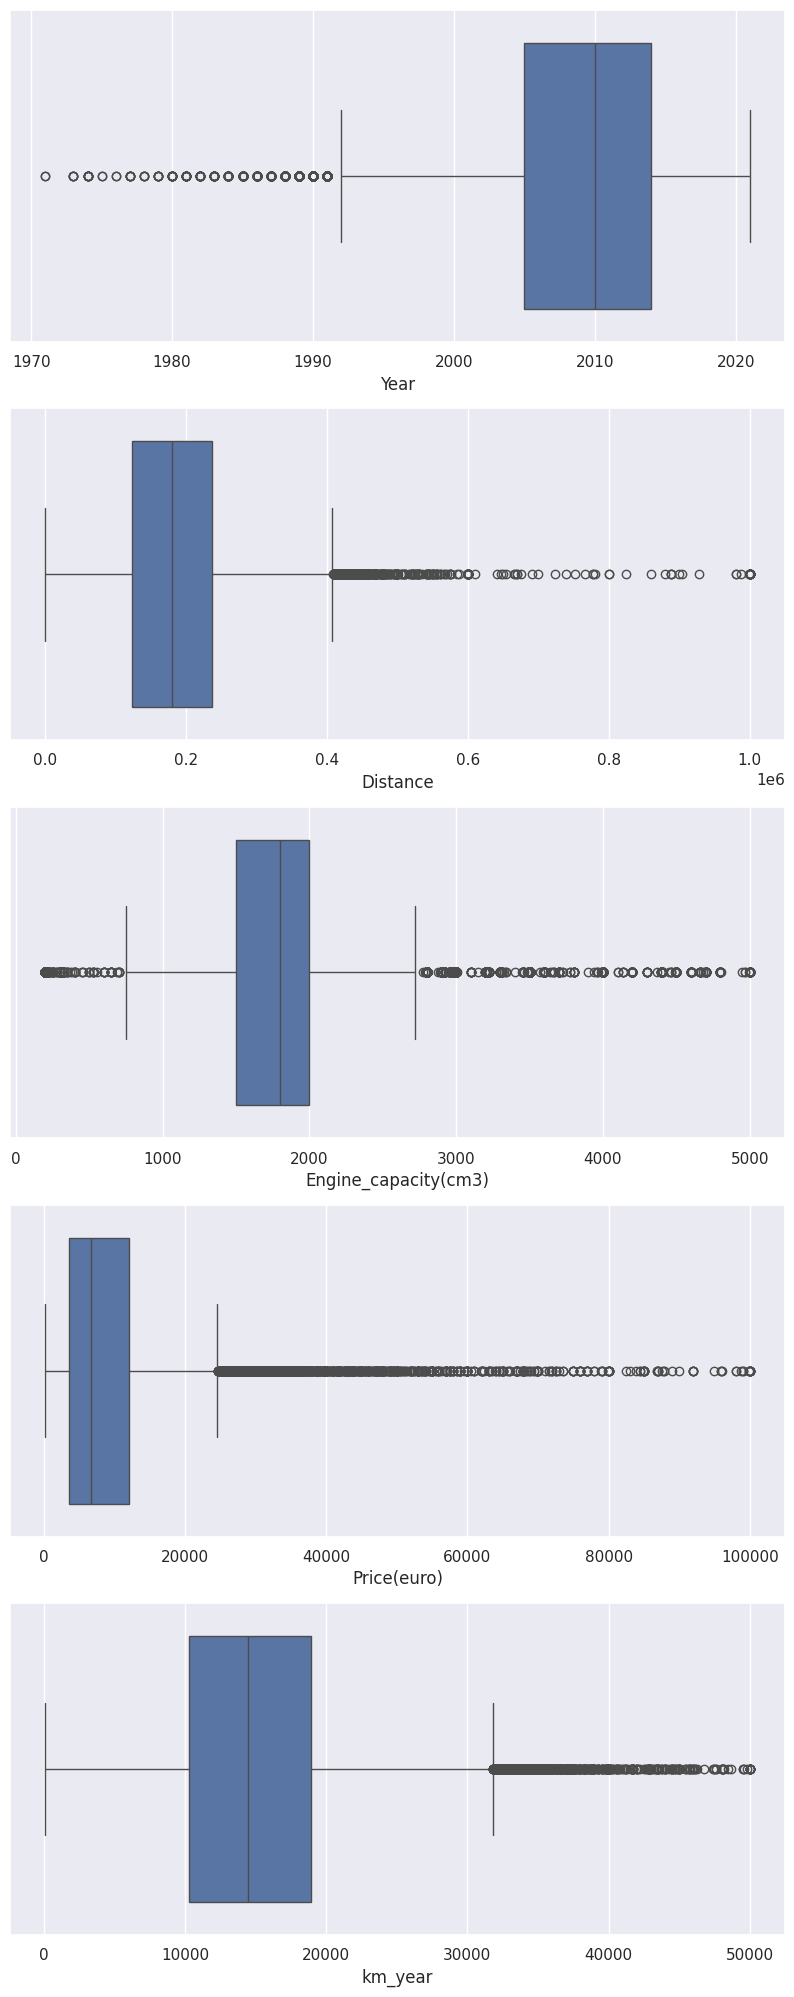

In [ ]:


fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

Посмотрим на корреляцию численных столбцов

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True)
df_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns
df_numeric.corr().style.background_gradient(cmap=cm, vmin=-1, vmax=1)

## Категориальные данные
посмотрим на число повторений результата в каждом категориальном признаке

In [ ]:
df[cat_columns].nunique()

Make             78
Model           777
Style            12
Fuel_type         6
Transmission      2
dtype: int64

Оказалось, что часть из наших признаков имеют слишком много записей. Вероятно, редкие из них можно исключить без потери точности. Мы сделаем эту операцию объявив такие записи одним типом - rare.

In [ ]:
counts = df.Make.value_counts()

counts

Make
Volkswagen    3423
Toyota        3083
Mercedes      3015
BMW           2594
Renault       2346
              ... 
Abarth           1
Zotye            1
Tata             1
Saturn           1
Pontiac          1
Name: count, Length: 78, dtype: int64

In [ ]:
counts.median()

32.5

In [ ]:
counts[counts<100]

Make
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Lincoln             49
Dodge               49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu            25
UAZ                 21
Chery               18
Great Wall          17
Lancia              17
Cadillac            16
Saab                15
Acura               14
Byd                 14
Brilliance          14
Alta marca          13
Zaz                 13
Lifan               10
Lada                 9
Isuzu                6
LuAZ                 5
GMC                  5
Buick                5
Ravon                5
Maserati             4
Geely                3
Haima                3
Scion                3
Hummer               3
Tesla                3
Datsun               3
Faw                  2
Mercedes-Maybach     2
ARO                  2
Groz                 1
Changan              1
Abarth               1
Zotye                1
Tata                 1
Saturn               1
Pontiac              1
Name: count, dtype: int64

In [ ]:
rare =  counts[(counts.values < 25)]
df['Make'] = df['Make'].replace(rare.index.values, 'Rare')
df.Make.value_counts()

Make
Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu            25
Name: count, dtype: int64

In [ ]:
counts = df.Model.value_counts()

counts

Model
E Class     1092
5 Series    1035
Passat       861
Megane       804
Astra        791
            ... 
Odyssey        1
Blazer         1
GW Peri        1
4007           1
Siber          1
Name: count, Length: 777, dtype: int64

In [ ]:
counts.median()

9.0

In [ ]:
counts[counts<100]

Model
Clio       97
X-Trail    93
Combo      88
Juke       88
A Class    87
           ..
Odyssey     1
Blazer      1
GW Peri     1
4007        1
Siber       1
Name: count, Length: 704, dtype: int64

In [ ]:
counts = df.Model.value_counts()
rare =  counts[(counts.values <  50)]
df['Model'] = df['Model'].replace(rare.index.values, 'Rare')
df.Model.value_counts()

Model
Rare             6608
E Class          1092
5 Series         1035
Passat            861
Megane            804
                 ... 
Urban Cruiser      52
GLC                52
Accent             51
Matrix             50
S60                50
Name: count, Length: 136, dtype: int64

## Сохранение DataFrame в файл


Метод .to_csv(path, index)

In [ ]:
import pandas as pd

# Пример создания DataFrame
data = {
    'Марка': ['Toyota', 'Honda', 'Ford'],
    'Модель': ['Corolla', 'Civic', 'Mustang'],
    'Год': [2020, 2019, 2021]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Сохранение DataFrame в CSV-файл
df.to_csv('/content/cars_moldova_clean.csv', index=False)


# Приведение категориальных признаков к численным

### Бинарные признаки

In [ ]:
import pandas as pd


df = pd.read_csv('/content/cars_moldova_clean.csv')

print("Имеющиеся столбцы:", df.columns)

# Очистка названий столбцов от лишних пробелов
df.columns = df.columns.str.strip()

# Проверка наличия столбца 'Transmission'
if 'Transmission' in df.columns:
    # Преобразование значений столбца 'Transmission'
    df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})
    print(df.head())  # Для проверки результата
else:
    print("Столбец 'Transmission' не найден в DataFrame.")

Имеющиеся столбцы: Index(['Марка', 'Модель', 'Год'], dtype='object')
Столбец 'Transmission' не найден в DataFrame.


### Кодирование многозначных признаков

In [ ]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int8   
 1   Model                 32220 non-null  int16  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int8   
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int8   
 7   Transmission          32220 non-null  int8   
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int16(1), int64(2), int8(4)
memory usage: 1.7 MB


In [ ]:
df_se.head()

Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0    40     92  2011      4  195000.0                1800.0          2   
1    32     62  2014     11  135000.0                1500.0          0   
2    32     71  2012     11  110000.0                1500.0          0   
3    28     23  2006     11  200000.0                1600.0          3   
4    23    126  2000      5  300000.0                2200.0          0   

   Transmission  Price(euro)  Age       km_year  
0             1       7750.0   11  17727.272727  
1             0       8550.0    8  16875.000000  
2             0       6550.0   10  11000.000000  
3             0       4100.0   16  12500.000000  
4             0       3490.0   22  13636.363636

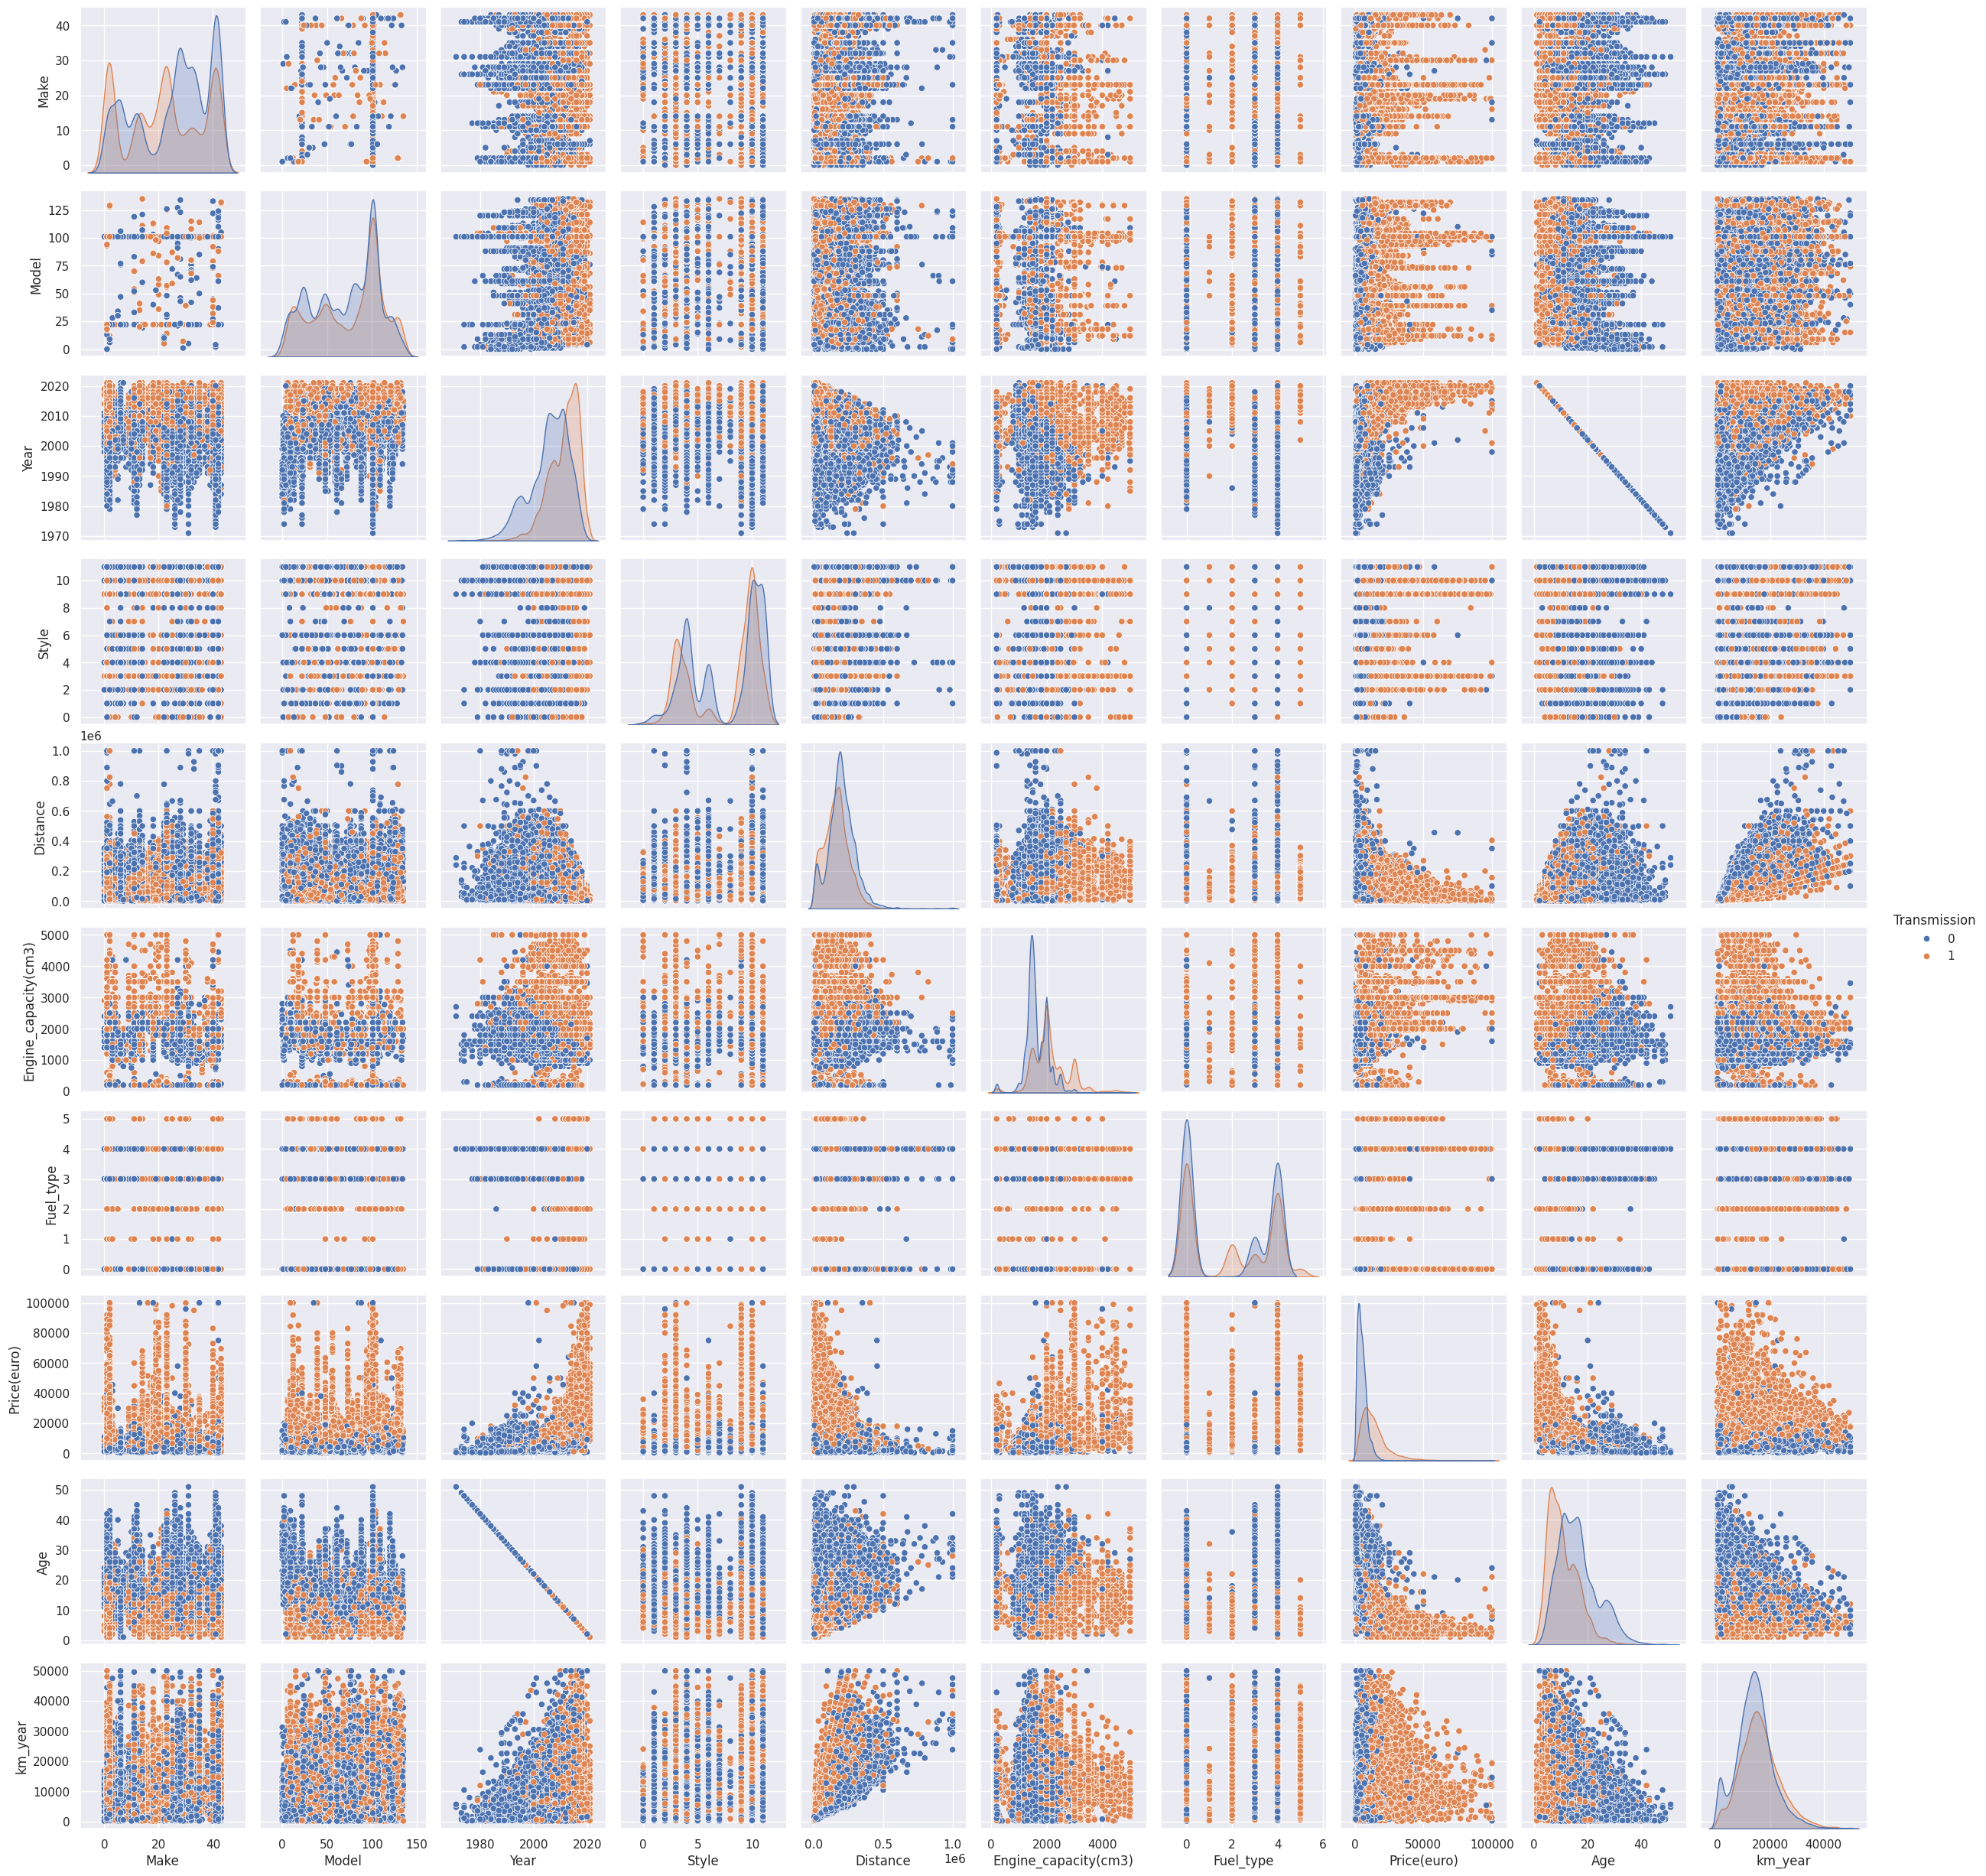

In [ ]:
sns.pairplot(data = df_se, hue ='Transmission');

### One-hot кодирование многозначных признаков

In [ ]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

Year  Distance  Engine_capacity(cm3)  Transmission  Price(euro)  Age  \
32215  2016   88000.0                1800.0             1      11500.0    6   
32216  2002  225000.0                1800.0             0       4400.0   20   
32217  2015   89000.0                1500.0             0       7000.0    7   
32218  2006  370000.0                2000.0             0       4000.0   16   
32219  2006  300000.0                1500.0             0       4000.0   16   

            km_year  Make_Alfa Romeo  Make_Audi  Make_BMW  ...  \
32215  14666.666667            False      False     False  ...   
32216  11250.000000            False      False     False  ...   
32217  12714.285714            False      False     False  ...   
32218  23125.000000            False      False     False  ...   
32219  18750.000000            False      False     False  ...   

       Style_Roadster  Style_SUV  Style_Sedan  Style_Universal  \
32215           False      False         True            False   
32216           False      False        False            False   
32217           False      False        False             True   
32218           False      False        False            False   
32219           False      False        False            False   

       Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_Hybrid  \
32215             False               False             False   
32216             False               False             False   
32217              True               False             False   
32218              True               False             False   
32219              True               False             False   

       Fuel_type_Metan/Propan  Fuel_type_Petrol  Fuel_type_Plug-in Hybrid  
32215                   False              True                     False  
32216                    True             False                     False  
32217                   False             False                     False  
32218                   False             False                     False  
32219                   False             False                     False  

[5 rows x 205 columns]

In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Columns: 205 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: bool(198), float64(4), int64(3)
memory usage: 7.8 MB


### Сохранение DataFrame в файл


Метод .to_csv(path, index)

In [ ]:
df_se.to_csv('/content/cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('/content/cars_moldova_onehot.csv',index=False)

# Контрольные вопросы

**1.Какие числовые признаки называются дискретными, а какие —
непрерывными? Приведите собственные примеры.**

Дискретные числовые признаки невозможно измерить, но можно посчитать - работники предприятия

Непрерывные числовые признаки невозможно посчитать но можно измерить - давление ртутного столба


**2.Опишите разницу между обучением с учителем и обучением
без учителя.**

При обучение с учителем используется обучающий набор данных (тренировочной выборки).Для каждого экземпляра
из набора данных есть пары «входные данные/признаки — ожидаемый
ответ».

При обучении без учителя, сам процесс обучения будет затруднён,
так как изначально мы имеем только данные и нужно ещё найти закономерности в этих данных




**3.Опишите разницу между задачами классификации и регрессии.**

Задача классификации сводится к построению такой разделяющей кривой,
которая способна предсказывать метку или класс объекта - применяется при обучении с учителем  

Задача регрессии решается если, множество возможных ответов может быть почти бесконечным,
т. е. Y ∈ R - применяется при обучение без учителя

**3.Опишите разницу между задачами классификации и регрессии.**

Задача классификации сводится к построению такой разделяющей кривой,
которая способна предсказывать метку или класс объекта - применяется при обучении с учителем  

Задача регрессии решается если, множество возможных ответов может быть почти бесконечным,
т. е. Y ∈ R - применяется при обучение без учителя

**4.Если вас попросят создать программу, которая будет определять кошку или собаку по изображению, к какому типу задач
машинного обучения относится эта просьба**

Если множество возможных ответов конечно, то речь идет о задаче классификации


**5.Почему в качестве альтернативы простому использованию всех
тренировочных данных рекомендуется выполнять проверку модели на валидационных данных?**

В основном чтобы избежать переобучения
Мы можем взять «кусочек» тренировочной выборки, отложить его, обучить модель на остальной
тренировочной выборке и проверить на отложенном «кусочке». Такой тип валидации называется использованием отложенной выборки


**6.Даны три матрицы A, B, C. Матрица A имеет размеры 5 × 4, B —
размеры 4 × 6, C имеет размеры 3 × 5. Укажите все возможные
матрицы, которые можно перемножить между собой.**

Умножить две матрицы можно только в том случае, если число столбцов первой (m) равняется числу строк второй (n).
Отсюда можно перемножить А х B и С х А


**7.Найдите градиент функции** 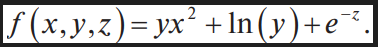

Вектор, составленный из частных производных, называется градиент

Для x - 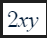

Для y - 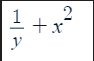

Для z - 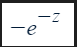

Решал с помощью калькулятора градиента

**8.Найдите частные производные сложной функции** 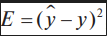,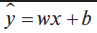 **по переменным w и b.**

w = m - 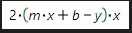

b = u - image.png

**9.Найдите частные производные сложной функции** 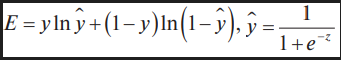 **по переменной z.**

Получаем 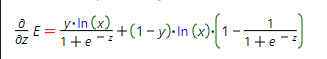

Ответ = 0